### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
prices = pd.read_csv('train.csv')

In [3]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There seems to be some columns with null values. So checking null percentage

In [4]:
print(round(prices.isnull().sum()/len(prices.index),2).sort_values(ascending=False).to_markdown())

|               |    0 |
|:--------------|-----:|
| PoolQC        | 1    |
| MiscFeature   | 0.96 |
| Alley         | 0.94 |
| Fence         | 0.81 |
| FireplaceQu   | 0.47 |
| LotFrontage   | 0.18 |
| GarageYrBlt   | 0.06 |
| GarageFinish  | 0.06 |
| GarageType    | 0.06 |
| GarageQual    | 0.06 |
| GarageCond    | 0.06 |
| BsmtExposure  | 0.03 |
| BsmtQual      | 0.03 |
| BsmtCond      | 0.03 |
| BsmtFinType2  | 0.03 |
| BsmtFinType1  | 0.03 |
| MasVnrType    | 0.01 |
| MasVnrArea    | 0.01 |
| Id            | 0    |
| Functional    | 0    |
| Fireplaces    | 0    |
| KitchenQual   | 0    |
| KitchenAbvGr  | 0    |
| BedroomAbvGr  | 0    |
| HalfBath      | 0    |
| FullBath      | 0    |
| BsmtHalfBath  | 0    |
| BsmtFullBath  | 0    |
| TotRmsAbvGrd  | 0    |
| GarageCars    | 0    |
| LowQualFinSF  | 0    |
| GarageArea    | 0    |
| PavedDrive    | 0    |
| WoodDeckSF    | 0    |
| OpenPorchSF   | 0    |
| EnclosedPorch | 0    |
| 3SsnPorch     | 0    |
| ScreenPorch   | 0    |


Removing values with 10% or more null values

In [5]:
limitPer = len(prices) * .90
prices = prices.dropna(thresh=limitPer, axis=1)

In [6]:
print(round(prices.isnull().sum()/len(prices.index),2).sort_values(ascending=False).to_markdown())

|               |    0 |
|:--------------|-----:|
| GarageType    | 0.06 |
| GarageYrBlt   | 0.06 |
| GarageFinish  | 0.06 |
| GarageQual    | 0.06 |
| GarageCond    | 0.06 |
| BsmtFinType1  | 0.03 |
| BsmtQual      | 0.03 |
| BsmtCond      | 0.03 |
| BsmtExposure  | 0.03 |
| BsmtFinType2  | 0.03 |
| MasVnrType    | 0.01 |
| MasVnrArea    | 0.01 |
| BedroomAbvGr  | 0    |
| HalfBath      | 0    |
| FullBath      | 0    |
| BsmtHalfBath  | 0    |
| BsmtFullBath  | 0    |
| KitchenAbvGr  | 0    |
| KitchenQual   | 0    |
| GrLivArea     | 0    |
| LowQualFinSF  | 0    |
| TotRmsAbvGrd  | 0    |
| Id            | 0    |
| Functional    | 0    |
| Fireplaces    | 0    |
| SaleCondition | 0    |
| SaleType      | 0    |
| YrSold        | 0    |
| MoSold        | 0    |
| MiscVal       | 0    |
| PoolArea      | 0    |
| ScreenPorch   | 0    |
| 3SsnPorch     | 0    |
| EnclosedPorch | 0    |
| OpenPorchSF   | 0    |
| WoodDeckSF    | 0    |
| PavedDrive    | 0    |
| GarageArea    | 0    |


There are still some columns which have null values, so we have to explore them individually 

In [7]:
haveNullValues = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtFinType1','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','MasVnrType','MasVnrArea']

In [8]:
len(haveNullValues)

12

In [9]:
prices[haveNullValues].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   GarageFinish  1379 non-null   object 
 3   GarageQual    1379 non-null   object 
 4   GarageCond    1379 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtQual      1423 non-null   object 
 7   BsmtCond      1423 non-null   object 
 8   BsmtExposure  1422 non-null   object 
 9   BsmtFinType2  1422 non-null   object 
 10  MasVnrType    1452 non-null   object 
 11  MasVnrArea    1452 non-null   float64
dtypes: float64(2), object(10)
memory usage: 137.0+ KB


In [10]:
for type in haveNullValues:
    print(prices[type].value_counts(), end='\n\n')

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

None       864
BrkFace   

According to dictionary, NA in:
- GarageType means No Garage in home,  So we can replace NA with NoGarage
- GarageYrBlt is years garage old, and since NA in GarageType and GarageYrOld is equal, so GarageYrOld null will be there where there is no garage, so we replace NA with 0
- GarageFinish is Interior finish of the garage, so it is NA in homes where there is no garage, so we can place NoGarage
- GarageQual is garage quality, so it is NA where there is no garage, so we can replace NA with NoGarage
- GarageCond is garage condition, so it is NA where there is no garage, so we can replace NA with NoGarage
- BsmtFinType1 is Rating of basement finished area, so it is NA where there is no basement, so we can replace NA with NoBasement
- BsmtFinType2 is Rating of basement finished area, so it is NA where there is no basement, so we can replace NA with NoBasement
- BsmtQual is NA where there is no basement, so we can replace NA with NoBasement
- BsmtCond is NA where there is no basement, so we can replace NA with NoBasement
- BsmtExposure is NA where there is no basement, so we can replace NA with NoBasement
- MasVnrType is NA where there is no masonry veneer, so we can replace NA with NoMasVnr
- MasVnrArea is NA where there is no masonry veneer, so we can replace NA with 0

In [11]:
prices.GarageType.fillna('NoGarage',inplace=True)
prices.GarageYrBlt.fillna(0,inplace=True)
prices.GarageFinish.fillna('NoGarage',inplace=True)
prices.GarageQual.fillna('NoGarage',inplace=True)
prices.GarageCond.fillna('NoGarage',inplace=True)
prices.BsmtFinType1.fillna('NoBasement',inplace=True)
prices.BsmtFinType2.fillna('NoBasement',inplace=True)
prices.BsmtQual.fillna('NoBasement',inplace=True)
prices.BsmtCond.fillna('NoBasement',inplace=True)
prices.BsmtExposure.fillna('NoBasement',inplace=True)
prices.MasVnrType.fillna('NoMasVnr',inplace=True)
prices.MasVnrArea.fillna(0,inplace=True)

Dropping `Id` as it does not provide any value

In [12]:
prices.drop(columns=['Id'], inplace=True)

Converting all columns which represent year, to how old it is:
- `YearBuilt` to `YearOld`
- `YearRemodAdd` to `YearRemodOld`
- `GarageYrBlt` to `GarageYrOld`. Note if `GarageYrBlt` is 0, it means garage is not build, so we will replace `GaragerOld` to -1.
- `YrSold` to `YrSoldOld`

And after getting the columns, we will remove the previous columns

In [13]:
prices['YearOld'] = prices.YearBuilt.max()-prices.YearBuilt
prices['YearRemodOld'] = prices.YearRemodAdd.max()-prices.YearRemodAdd
prices['GarageYrOld'] = prices.GarageYrBlt.apply(lambda x: -1 if int(x)==0 else int(prices.GarageYrBlt.max())-int(x))
prices['YrSoldOld'] = prices.YrSold.max()-prices.YrSold
prices.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)

In [14]:
categoricalFeatures = ['MSSubClass','MSZoning','Street','LotShape','LandContour',
                       'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                      'Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
                      'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                       'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                      'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                      'CentralAir','Electrical','KitchenQual','Functional',
                      'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','MoSold','SaleType','SaleCondition']
continousFeatures = ['LotArea','YearOld','YearRemodOld','MasVnrArea','BsmtFinSF1',
                    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                    'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                    'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                    'GarageYrOld','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                    'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSoldOld','SalePrice']

In [15]:
prices['MSSubClass'] = prices.MSSubClass.map({20:'1_STORY_1946_AND_NEWER',
                                           30:'1_STORY_1946_AND_OLDER',
                                          40:'1_STORY_FINISHED',
                                          45:'1_HALF_STORY_UNFINISHED',
                                          50:'1_HALF_STORY_FINISHED',
                                          60:'2_STORY_1946_AND_NEWER',
                                          70:'2_STORY_1946_AND_OLDER',
                                          75:'2_HALF_STORY',
                                          80:'SPLIT_OR_MULTI_LEVEL',
                                          85:'SPLIT_FOYER',
                                          90:'DUPLEX ',
                                          120:'1_STORY_PUD',
                                          150:'1_HALF_STORY_PUD',
                                          160:'2_STORY_PUD_1946_AND_NEWER',
                                          180:'PUD_MULTILEVEL',
                                          190:'2_FAMILY_CONVERSION'})

Creating dummy variables

In [16]:
for item in categoricalFeatures:
    dummy_col = pd.get_dummies(prices[[item]],
                               drop_first=True)
    prices = pd.concat([prices,dummy_col],axis='columns')
    prices.drop(columns=[item], inplace=True)

## Build the Linear Regression Model

In [17]:
df_train,df_test = train_test_split(prices,train_size=0.7,test_size=0.3,random_state=100)

## Scaling the dataset

In [18]:
scaler = MinMaxScaler()
df_train[continousFeatures] = scaler.fit_transform(df_train[continousFeatures])
df_test[continousFeatures] = scaler.transform(df_test[continousFeatures])

In [19]:
# Read in the data
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

# 4. Model Building and Evaluation

## Ridge Regression

In [20]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [21]:
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

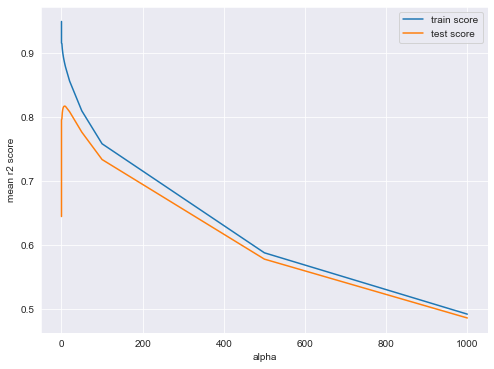

In [22]:
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [23]:
best_alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=best_alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01981337,  0.03192779,  0.01687732,  0.00907012,  0.02277971,
        0.02648745,  0.04986653,  0.06894258, -0.00544698,  0.0682138 ,
        0.02303353,  0.00225277,  0.04428933,  0.01452706,  0.00594993,
       -0.01623821,  0.04216305,  0.03365025,  0.04038137,  0.02842119,
        0.0198381 ,  0.0051043 ,  0.00118955,  0.01137964,  0.00859493,
        0.00528703,  0.00033879, -0.0053591 , -0.02158415,  0.00199724,
        0.00415534,  0.00393748,  0.01039869, -0.00480939,  0.00470252,
       -0.00981112, -0.00979889,  0.00666082, -0.00087319,  0.00999224,
       -0.01357787, -0.00652377, -0.00909768, -0.00187591, -0.00219897,
        0.00805918,  0.00781999,  0.01225584,  0.00584529,  0.00488966,
        0.00327049, -0.01492919, -0.00029147,  0.01745716,  0.01347204,
        0.01793941, -0.00522311,  0.01580819, -0.01554647, -0.00521352,
       -0.00357694,  0.00652221,  0.00425871, -0.00158238,  0.00015369,
       -0.00105672,  0.00010375, -0.01137871,  0.02683516, -0.02

In [24]:
best_alpha

8.0

In [25]:
y_train_pred = ridge.predict(X_train)
print("R2 Score train", r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print("R2 Score test", r2_score(y_true=y_test, y_pred=y_test_pred))

R2 Score train 0.8799070313830523
R2 Score test 0.8575110315716996


### Analysis from Ridge Regression

The best alpha value is found to be 8.0 and R2 score made from model with alpha 10 is 87.99% in train set and 85.75% in test set which does not show any major variation 

Top 10 features of Ridge regression


In [26]:
# Coefficients list
model_ridge_parameters = list(ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]
cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
0,constant,0.097
8,2ndFlrSF,0.069
10,GrLivArea,0.068
78,Neighborhood_NoRidge,0.064
7,1stFlrSF,0.050
125,RoofMatl_WdShngl,0.047
13,FullBath,0.044
17,TotRmsAbvGrd,0.042
19,GarageCars,0.040
79,Neighborhood_NridgHt,0.037


## Lasso Regression

In [27]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [28]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

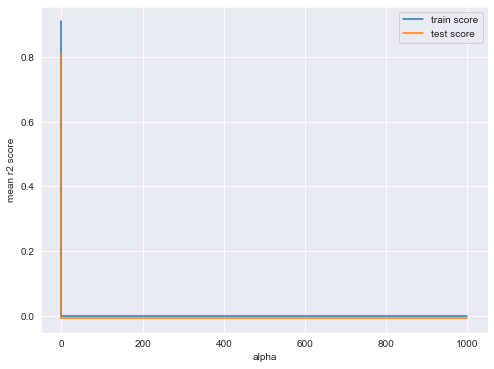

In [29]:
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [30]:
best_alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=best_alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 3.40292223e-02,  2.82056535e-02,  0.00000000e+00,  0.00000000e+00,
        3.18089046e-03,  0.00000000e+00,  0.00000000e+00,  4.47077957e-02,
       -2.27180891e-02,  3.77320251e-01,  2.39713610e-02,  0.00000000e+00,
        2.64889045e-02,  1.33494633e-04, -0.00000000e+00, -5.22846970e-02,
        0.00000000e+00,  1.96301832e-02,  5.50990891e-02,  0.00000000e+00,
        1.10632476e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        7.20517465e-03, -0.00000000e+00,  0.00000000e+00, -3.71651370e-03,
       -2.06158983e-02, -0.00000000e+00,  1.17079497e-03,  0.00000000e+00,
        1.32259184e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -9.79381036e-03, -0.00000000e+00, -0.00000000e+00,  1.27864624e-03,
       -3.55348507e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.75206478e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.80351319e-02,
        3.97228680e-04,  

In [31]:
best_alpha

0.0001

In [32]:
y_train_pred = lasso.predict(X_train)
print("R2 Score train", r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print("R2 Score test", r2_score(y_true=y_test, y_pred=y_test_pred))

R2 Score train 0.8993450448434477
R2 Score test 0.8496817271601458


### Analysis from Lasso Regression

The best alpha value is found to be 100.0 and R2 score made from model with alpha 100 is 89.93% in train set and 84.96% in test set which does not show any major variation

Top 10 features of Lasso regression


In [33]:
# Coefficients list
model_lasso_parameters = list(lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]
cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
(lasso_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
10,GrLivArea,0.377
125,RoofMatl_WdShngl,0.131
0,constant,0.071
78,Neighborhood_NoRidge,0.068
19,GarageCars,0.055
79,Neighborhood_NridgHt,0.046
8,2ndFlrSF,0.045
85,Neighborhood_StoneBr,0.044
1,LotArea,0.034
69,Neighborhood_Crawfor,0.033


# Model Evaluation

## Ridge Regression

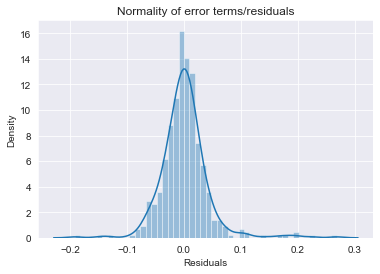

In [34]:
y_test_pred = ridge.predict(X_test)
y_res=y_test-y_test_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

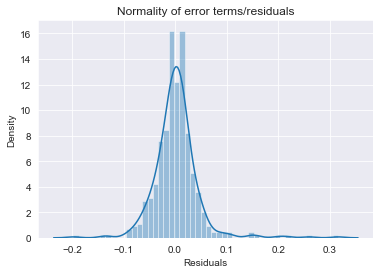

In [35]:
y_test_pred = lasso.predict(X_test)
y_res=y_test-y_test_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

# Question 3

In [36]:
prices.drop(columns=['2ndFlrSF','GrLivArea','Neighborhood_NoRidge','1stFlrSF','RoofMatl_WdShngl'], inplace=True)

In [37]:
df_train,df_test = train_test_split(prices,train_size=0.7,test_size=0.3,random_state=100)

In [38]:
continousFeatures.remove('1stFlrSF')
continousFeatures.remove('2ndFlrSF')
continousFeatures.remove('GrLivArea')
scaler = MinMaxScaler()
df_train[continousFeatures] = scaler.fit_transform(df_train[continousFeatures])
df_test[continousFeatures] = scaler.transform(df_test[continousFeatures])

In [39]:
# Read in the data
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [40]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [41]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

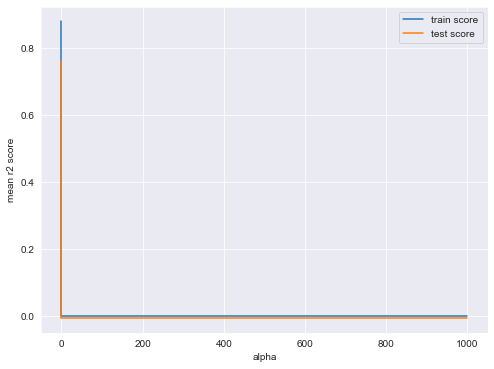

In [42]:
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [43]:
best_alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=best_alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 8.61733744e-02,  8.92037571e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.86900094e-01, -8.47143072e-03,  2.14819239e-02,
        0.00000000e+00,  7.75786284e-02,  2.97645371e-02,  0.00000000e+00,
       -5.58128230e-02,  1.04363500e-01,  2.89042265e-02,  6.29785804e-02,
        1.56866434e-02,  2.07435667e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.25178517e-04,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.29042989e-02,  0.00000000e+00,  4.12152022e-03,
        0.00000000e+00,  6.38064596e-03, -5.25022495e-03,  0.00000000e+00,
       -5.18481332e-03, -1.49854351e-02,  2.99246150e-03,  2.84957695e-03,
        2.27479813e-03, -1.52501239e-02, -1.31306927e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.54148925e-03,
        4.04042512e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -4.25964951e-02, -1.06375443e-03,  1.29587413e-02,  1.54051016e-02,
        1.46120846e-02, -

In [44]:
best_alpha

0.0001

## Top 5 features of Lasso regression

In [45]:
# Coefficients list
model_lasso_parameters = list(lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]
cols = X_train.columns
cols = cols.insert(0,'constant')


In [46]:
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
(lasso_params_df.sort_values('Coef', ascending=False)).head(6)

,Params,Coef
6,TotalBsmtSF,0.187
0,constant,0.132
14,TotRmsAbvGrd,0.104
2,MasVnrArea,0.089
1,LotArea,0.086
10,FullBath,0.078
